<a href="https://colab.research.google.com/github/shailavij/NLP/blob/master/SPAM_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/spam.tsv',sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.shape

(5572, 4)

In [5]:
# TO chk any missing field
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
#Here the data is unbalanced , since ham = 4825, spam =747. Model will unable to classify .
# Its requried to balane the data

In [8]:
ham=df[df['label']=='ham']
ham.shape

(4825, 4)

In [9]:
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [10]:
spam = df[df['label']=='spam']
spam.shape

(747, 4)

In [11]:
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [12]:
# to select 'ham' msg randomly which is equal to spam msg


In [13]:
ham= ham.sample(spam.shape[0])
ham.shape

(747, 4)

In [14]:
ham.head()

,label,message,length,punct
4569,ham,hiya hows it going in sunny africa? hope u r a...,112,3
4336,ham,"Now u sound like manky scouse boy steve,like! ...",115,4
3576,ham,And do you have any one that can teach me how ...,59,1
1000,ham,"Aight will do, thanks again for comin out",41,1
1713,ham,o turns out i had stereo love on mi phone unde...,66,1


In [15]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [16]:
# Now both spam , ham data are balanced. Lets append ham, spam into single dataset

In [17]:
data= ham.append(spam,ignore_index=True)
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


In [18]:
data.shape

(1494, 4)

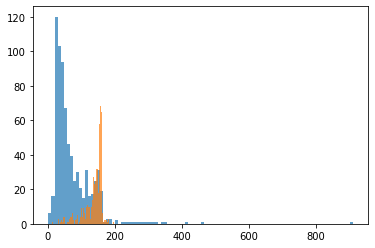

In [23]:
# Exploratory Data Analysis

plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()

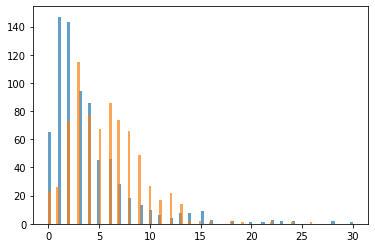

In [24]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show()

# Data Prepration

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.pipeline import Pipeline

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
data.head()

,label,message,length,punct
0,ham,hiya hows it going in sunny africa? hope u r a...,112,3
1,ham,"Now u sound like manky scouse boy steve,like! ...",115,4
2,ham,And do you have any one that can teach me how ...,59,1
3,ham,"Aight will do, thanks again for comin out",41,1
4,ham,o turns out i had stereo love on mi phone unde...,66,1


In [40]:
X_train, X_test, Y_train, Y_test= train_test_split(data['message'],data['label'],random_state=0,shuffle=True,stratify =data['label'])

In [33]:
# Bag of word creation

In [34]:
vectorizer= TfidfVectorizer()

In [35]:
X_train=vectorizer.fit_transform(X_train)

In [36]:
X_train.shape

(1120, 3905)

In [37]:
X_train

<1120x3905 sparse matrix of type '<class 'numpy.float64'>'
	with 19239 stored elements in Compressed Sparse Row format>

In [ ]:
# Pipeline and RandomForest Classifier

In [58]:
clf= Pipeline([('tfidf',TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100,n_jobs=-1))])

In [42]:
clf.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [43]:
y_pred=clf.predict(X_test)

In [45]:
confusion_matrix(Y_test,y_pred)

array([[186,   1],
       [ 22, 165]])

In [47]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.89      0.99      0.94       187
        spam       0.99      0.88      0.93       187

    accuracy                           0.94       374
   macro avg       0.94      0.94      0.94       374
weighted avg       0.94      0.94      0.94       374



In [48]:
accuracy_score(Y_test,y_pred)

0.9385026737967914

In [49]:
clf.predict(["Hi , this is shailaja"])

array(['ham'], dtype=object)

In [54]:
clf.predict(["Congratulation! you have won free ticket to the USA  this summer TEXT 'WON' 3342224 'WON' "])

array(['spam'], dtype=object)

SVM & Pipeline

In [98]:
clf= Pipeline([('tfidf',TfidfVectorizer()), ('clf', SVC(C=2000, gamma='auto'))])

In [99]:
clf.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=2000, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_fun

In [100]:
y_pred=clf.predict(X_test)

In [101]:
confusion_matrix(Y_test,y_pred)

array([[182,   5],
       [ 15, 172]])

In [102]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.97      0.95       187
        spam       0.97      0.92      0.95       187

    accuracy                           0.95       374
   macro avg       0.95      0.95      0.95       374
weighted avg       0.95      0.95      0.95       374



In [103]:
accuracy_score(Y_test,y_pred)


0.946524064171123